# Introductory Statistics Workshop

Data Science Society @Berkeley | Fall 2018

Wednesday, November 14, 2018


### Introduction

Welcome to the workshop! Today you will be learning about:

*  RCT vs observational study
*  Randomization, sampling
*  Hypothesis Test
*  Confidence Interval
*  Visualizing data
*  Probability
*  Combinatorics

Throughout this notebook we use a python library called **Pandas** in order to store and display our data. If you would like to learn how to use Pandas in more detail, check out our Python workshop materials: https://tinyurl.com/dsspythonf18

https://pypi.python.org/pypi/datascience/

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## The Dataset

In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.

The data file (responses.csv) consists of 1010 rows and 150 columns (139 integer and 11 categorical).

Each row represents a young person's response. Each column is a question/topic on which each person had to give a rating or information. This link has more detailed description of the dataset: [Young People Survey](https://www.kaggle.com/miroslavsabo/young-people-survey).

Here is an example of convenience sampling, which isn't as accurate as pure simple random sampling, but is still reliable enough to formulate valid conclusions from. You are making conclusions of this data and not necessarily trying to generalize the conclusions to the whole population of young people, so convenience sampling is ok. Many times in real life, when conducting observational studies, you will be working with data that came from convenience sampling.



### Importing Data

Your code could look like:

`data_all = pd.read_csv('DSS 11-14 Stat Workshop/responses.csv')`

or

`data_all = pd.read_csv('folder_name/responses.csv')`

In [2]:
columns = pd.read_csv("https://raw.githubusercontent.com/krutikaingale/Data-Science-Society/master/columns.csv")
data_all = pd.read_csv("https://raw.githubusercontent.com/krutikaingale/Data-Science-Society/master/responses.csv")

In [3]:
data_all

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,...,20.0,177.0,50.0,1.0,female,right handed,secondary school,no,village,house/bungalow
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,19.0,184.0,90.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,...,18.0,166.0,55.0,1.0,female,right handed,secondary school,no,city,house/bungalow
9,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,19.0,174.0,60.0,3.0,female,right handed,secondary school,no,city,block of flats


### Spending Habits

Now let's study spending habits, specifically those of males and females.

We pick the columns that relate to spending, and pick the gender column. Columns are indexed at `0`. So we can reference columns by their index `0,1,2,...149`.

In [4]:
spending  = data_all.iloc[:,134:140] #.iloc[:, a:b] chooses columns indexed at a up to but not including b
spending['Gender'] = data_all['Gender']
spending

,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Gender
0,4.0,5.0,3.0,3.0,1,3.0,female
1,4.0,1.0,4.0,2.0,5,2.0,female
2,4.0,1.0,4.0,3.0,4,2.0,female
3,4.0,3.0,3.0,4.0,4,1.0,female
4,3.0,4.0,3.0,3.0,2,4.0,female
5,3.0,3.0,3.0,1.0,4,4.0,male
6,3.0,1.0,3.0,4.0,1,5.0,female
7,4.0,4.0,4.0,4.0,3,2.0,male
8,1.0,3.0,2.0,1.0,3,4.0,female
9,4.0,4.0,2.0,3.0,2,4.0,female


The columns represent these questions:

1.   I enjoy going to large shopping centres.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

2.   I prefer branded clothing to non branded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

3.   I spend a lot of money on partying and socializing.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

4.   I spend a lot of money on my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

5.   I spend a lot of money on gadgets.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

6.   I will hapilly pay more money for good, quality or healthy food.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)



*Note: From now on, when we reference "male and female spending", we mean "male and female spending ratings." *italicized text*

We can tell the entire dataframe to drop NaN values and convert them to 0s.

In [5]:
spending.fillna(0, inplace = True)
spending.head()

,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Gender
0,4.0,5.0,3.0,3.0,1,3.0,female
1,4.0,1.0,4.0,2.0,5,2.0,female
2,4.0,1.0,4.0,3.0,4,2.0,female
3,4.0,3.0,3.0,4.0,4,1.0,female
4,3.0,4.0,3.0,3.0,2,4.0,female


#### Aggregating Spending Scores

**Group Question.** What do larger ratings mean for spending habits? What do smaller ratings mean for spending habits? How can we combine all the responses for all 6 questions into 1 informative response?

In the table, larger numbers/ratings in essence implies that the person spends more. So let's sum up all the spending of each person into a single spending column. The resulting summed column will be of type float. 

Larger numbers/ratings should mean the person spends more.

In [6]:
spending_amount = spending.iloc[:, 0] + spending.iloc[:, 1] + spending.iloc[:, 2] + spending.iloc[:, 3] + spending.iloc[:, 4] + spending.iloc[:, 5] 
total_df = pd.DataFrame(spending_amount).rename(columns = {0: 'Spending Amount'})
total_df['Gender'] = spending['Gender']
total_df

,Spending Amount,Gender
0,19.0,female
1,18.0,female
2,18.0,female
3,19.0,female
4,19.0,female
5,18.0,male
6,17.0,female
7,21.0,male
8,14.0,female
9,19.0,female


#### Spending Habit By Gender

Now let's create a table with female spending and a table for male spending.

In [7]:
#female spending data frame
female_spending = total_df[total_df['Gender'] == 'female']
female_spending

,Spending Amount,Gender
0,19.0,female
1,18.0,female
2,18.0,female
3,19.0,female
4,19.0,female
6,17.0,female
8,14.0,female
9,19.0,female
10,17.0,female
11,10.0,female


In [8]:
#male spending data frame
male_spending = total_df[total_df['Gender'] == 'male']
male_spending

,Spending Amount,Gender
5,18.0,male
7,21.0,male
15,20.0,male
18,23.0,male
19,20.0,male
20,18.0,male
21,8.0,male
28,22.0,male
30,24.0,male
34,16.0,male


**Group Question.** Now which simulation method should we use (shuffling, bootsrapping, etc) and why? Could you give a basic outline of the simulation process?

Now we want to stack the total spending of females on top of the spending of males and put it into a data frame. We do this so we can run our simulation of shuffling for our hypothesis test.

In [9]:
appended_spending = female_spending['Spending Amount'].append(male_spending['Spending Amount'], ignore_index=True)

print("Number of Females: ", len(female_spending['Spending Amount']))
print("Number of Males: ",len(male_spending['Spending Amount']))
#These are only females and males, There are people who idenitfy otherwise in the actual dataset, but we're only focused on females and males
final_spending = pd.DataFrame(appended_spending)
final_spending
#females are the first 593 rows, males are the next 411 rows

Number of Females:  593
Number of Males:  411


,Spending Amount
0,19.0
1,18.0
2,18.0
3,19.0
4,19.0
5,17.0
6,14.0
7,19.0
8,17.0
9,10.0


The females are the first 593 rows, males are the next 411 rows. There are 1004 rows in total.

#### Test Statistic

**Group Question.** What is a good test statistic to use and why? Remember we're trying to compare two groups.

Let's compare the spending of males and females. We can do this by subtracting the male and female average spending. This will serve as our test statistic : male average spending - female average spending.

In [10]:
observed_test_statistic = male_spending['Spending Amount'].mean() - female_spending['Spending Amount'].mean()
observed_test_statistic


0.8549870139461575

The positive difference of 0.85 indicates that the male spending seems to be higher than the female spending, and that females may be more money-efficient than males. Higher ratings from the males implies that males don't mind spending more money.

## Hypothesis Testing

**Group Question.** What is our null and alternative hypothesis?

**Null Hypothesis**: There is no difference between male and female spending. The females' spendings are like a random sample of 593  out of all 1004 expenditures. If the males' average spending came out higher than that of the females, it is due to **chance** variation.

**Alternative Hypothesis**: The males' spending being higher than the females' spending is not due to chance. There is something other than chance causing the difference between male and female spending.

When you sample without replacement (by specifiying with_replacement=False) the same number of times as there are rows, you end up with a random shuffle of all the rows, which represents finding a new sample. Under the null hypothesis, differences in the female and male spending averages should be close to 0 (aka there is no difference between male and female spending). Under the null hypothesis, each new sample we get from shuffling the rows, male spending average - female spending average should be close to 0.

**Overarching method**: We shuffle the rows of final_spending by random sampling. Choose the top 593 rows of resulting sampled dataframe to represent female spendings and find the average spending. The remaining 411 rows will represent male spending and find the average. 

**Our test statistic:** male spending average - female spending average.

### Simulating Test Statistics

Pseudocode:


```
Declare an test_statistics_array

Repeat process 10,000 times to get 10,000 test statistics:

   In one sample:
   
           We shuffle the rows of final_spending by random sampling. Choose the top 593 rows of resulting sampled dataframe 
           to represent female spendings and find the average spending. The remaining 411 rows will represent male spending 
           and find the average. 
           
           this_sample's_test_statistic = male spending average - female spending average
           
           test_statistics_array.add on (this_sample's_test_statistic)
```


In [11]:
simulated_statistics = []
repetitions = 10000

for i in np.arange(repetitions):
    shuffled = final_spending.sample(n = len(final_spending.index), replace=False)
    female_mean = (shuffled.iloc[0:593])['Spending Amount'].mean()
    male_mean = (shuffled.iloc[593:len(final_spending.index)])['Spending Amount'].mean()
    test_statistic = male_mean - female_mean
    simulated_statistics = np.append(simulated_statistics, test_statistic)

In [12]:
simulated_statistics

array([ 0.12584779,  0.36477476, -0.19958724, ..., -0.2078261 ,
       -0.32317016,  0.3688942 ])

In [13]:
len(simulated_statistics)

10000

Our observed test statistic was 0.8549870139461575.

**P-value** : Chance (computed under the null hypothesis) of getting a test statistic equal to the one that was observed or more in the direction of the alternative. In our case, "direction of the alternative" means greater than or equal to 0.8549870139461575.

$$\mbox{P-value} = \frac{\mbox{number of differences we calculated under the null hypothesis that's greater than what was observed in the beginning}}{\mbox{total number of differences}}$$ 

By dividing we get the "chance" that we're looking for. We're trying to see if the observed test statistic is too extreme.

To calculate our p-value, we do `empirical_P = np.count_nonzero(simulated_statistics >= observed_statistic)/repetitions`


Observed Statistic: 0.8549870139461575
Empirical P: 0.0027
95% Confidence Interval: -0.5909331495180972 ,  0.5914464371438046


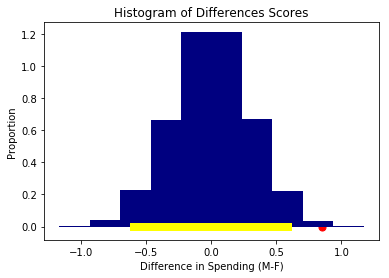

In [14]:
empirical_P = np.count_nonzero(simulated_statistics >= observed_test_statistic)/repetitions
print('Observed Statistic:', observed_test_statistic)
print('Empirical P:', empirical_P)

results = pd.DataFrame(np.array(simulated_statistics)).rename(columns = {0 : 'Simulated Statistics'})
results['Simulated Statistics'].plot(normed = True, kind='hist', color = 'navy')
plt.xlabel('Difference in Spending (M-F)')
plt.ylabel('Proportion')
plt.title('Histogram of Differences Scores')

plt.scatter(observed_test_statistic, 0, color='red', s=50);
left = results['Simulated Statistics'].sort_values(ascending = True).quantile(0.025)
right = results['Simulated Statistics'].sort_values(ascending = True).quantile(0.975)
print('95% Confidence Interval:', left, ", ", right )
plt.plot((left, right), (0, 0), 'yellow', lw = 8)
plt.show()

***Group Question***: What is the conclusion of our test and why? Explain.

What's the our p-value?

In [15]:
empirical_P

0.0027

**Observed Statistics**

Under null hypothesis, `male_spending - female_spending` should be close to 0, since we assume male and female spending is the same. The above histogram does show that, since it is centered at 0.

However, we see the observed test statistic is very "extreme" and lies away from the heart of the distribution. The observed test statistic, in red, is about 0.85, which means the `male_spending - female_spending` average is positive. This suggests that male spent more money than female, and that female save more money.

**P-Value**

The p-value is about 0.0026 and we use a p-value cutoff of 0.05 along with a 95% confidence interval.

Since 0.0026 < 0.05, and even < 0.01,  we see that the difference between male and female spending that was observed in the beginning is too extreme to have occurred by just chance. There is something other than chance that caused the males to spend more than females.

So we reject the null hypothesis that male and female spending habits of the young people who took the survey are the same.

## Data Visualization

### Bar Charts: Categorical Data

In [16]:
spending.head()

,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Gender
0,4.0,5.0,3.0,3.0,1,3.0,female
1,4.0,1.0,4.0,2.0,5,2.0,female
2,4.0,1.0,4.0,3.0,4,2.0,female
3,4.0,3.0,3.0,4.0,4,1.0,female
4,3.0,4.0,3.0,3.0,2,4.0,female


We can analyze some of this data using a bar graph.

**Discussion Question.** What does the data tell us about people's willingness to spend more money on "good" food?


For categorical data, we use a bar chart to visualize.

* can rearrange bars
* can flip the orientation of the graph

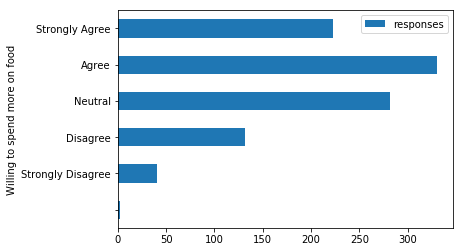

In [17]:
grouped = spending.groupby('Spending on healthy eating').count().iloc[:, :1]
grouped.index = ["", 'Strongly Disagree', 'Disagree', 'Neutral', "Agree", "Strongly Agree"]
grouped.index.names = ['Willing to spend more on food']
grouped.columns = ['responses']
grouped.plot(kind="barh")   # barh to flip bar

We can rearrange bars and still read the graph.

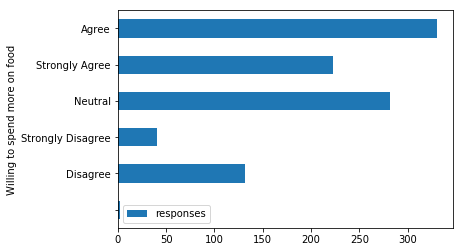

In [18]:
grouped = grouped.sample(6, replace=False) 
# took 6 samples from the set of 6 categories -> rearrange
grouped.plot(kind="barh")

**Data:** Top 200 highest grossing movies of all time.

In [19]:
movies = pd.read_csv("https://raw.githubusercontent.com/carlocrza/Data_Science_Society/master/top_movies.csv")
movies.head()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997


<Container object of 23 artists>

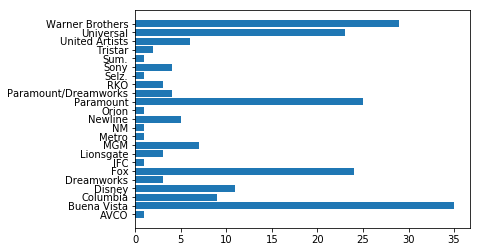

In [20]:
movies.to_csv("testing.csv")

g = movies[['Studio', 'Title']].groupby("Studio").count()
plt.barh(g.index, g['Title'])

### Histograms: Continuous Data

Say we wanted to know how many movies made more than `$`500 billion and how many made more than `$`600 million, etc. This is a distribution of the movie gross (dolloar amounts are continuous on a spectrum). We use a histogram to represent continuous data.

#### Setting Up the Plot

First, let's think about our x-axis: it will represent the amount of money made for movies. 

In [21]:
gross = movies[['Gross (Adjusted)']].apply(lambda x: np.round(x/1e6, 2))['Gross (Adjusted)']

min(gross), max(gross)

(338.41, 1796.18)

Our x-axis will go from `$`338 to `$`1796. Let's divide this range into **bins of width 100**.

In [22]:
np.histogram(gross, bins=np.arange(300,2001,100))

(array([68, 60, 32, 15,  7,  7,  3,  0,  3,  3,  0,  0,  1,  0,  1,  0,  0]),
 array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
        1400, 1500, 1600, 1700, 1800, 1900, 2000]))

What are the two arrays returned?

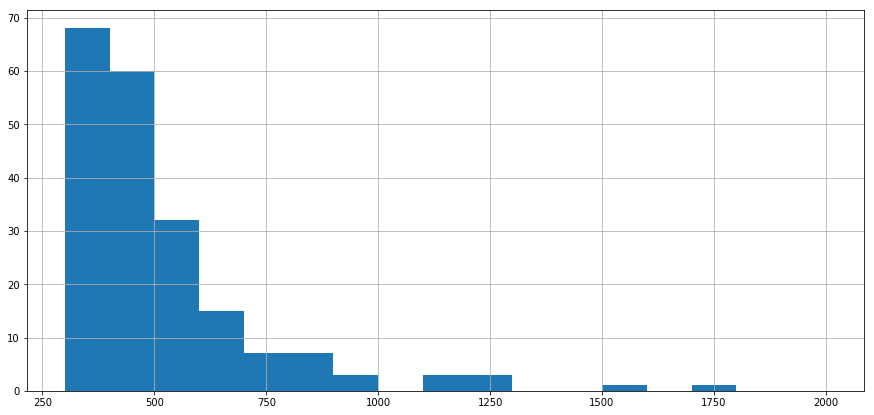

In [23]:
gross.hist(bins=np.arange(300,2001,100), figsize=(15,7))

Y-axis above is the number of occurrences.

#### Adjusting Bins

We can have unequal bin widths. Sometimes this is useful.

**Problem:** now it looks like there are a ton of movies that make more than 700 million.

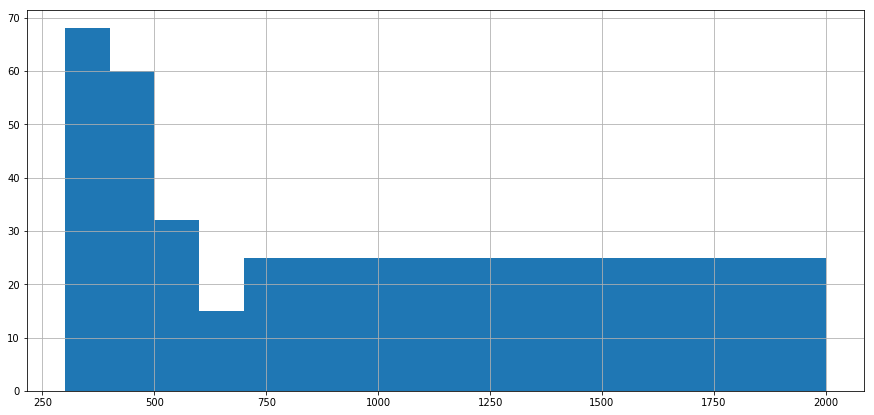

In [24]:
gross.hist(bins=list(np.arange(300,700,100)) + [700,2000], figsize=(15,7))

#### Density in Histograms

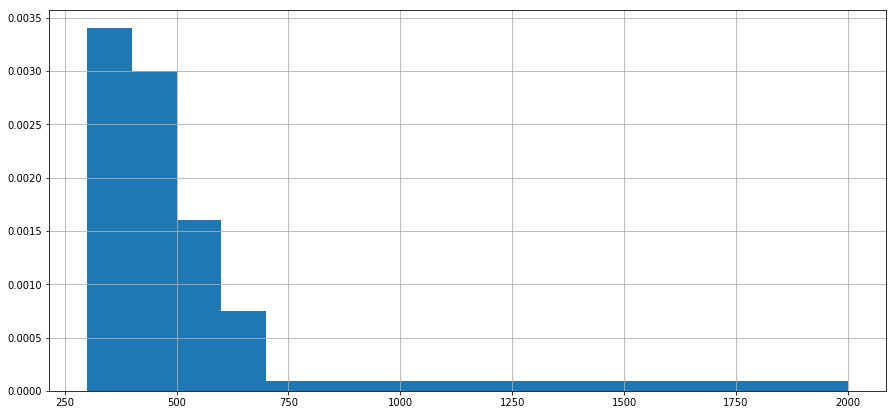

In [25]:
gross.hist(bins=list(np.arange(300,700,100)) + [700,2000], figsize=(15,7), density=True)

Now the y-axis represents "DENSITY" of Data. The height for the bin \[700, 2000) is now very low because it has super-low density (think huge bin width but few entries). Compared to the bin 300-400 with only a width of 100 but ~70 entries. 

How is this useful?
*  Visually makes more sense: even with unequal bins, we can see that movies from 300-400 are much more common than movies above 700
*  The area of a bin = the percent of values that appear in that bin:

$$\mbox{area of bar} = \mbox{percent of entries in bin}\\
\mbox{area of bar} = \mbox{height of bar} \times \mbox{width of bin}$$

**Question.** What percent of movies make between `$`300 and `$`500 million dollars?

In [26]:
movies_300_to_500 = 100 * 0.0034 + 100 * 0.003
movies_300_to_500

0.6399999999999999

## Probabilities

**So what's probability?**


Probability is the:
*   Chance
*   Likelihood

of something happening


**Why do we care?**



*   Help us make informed judgment from randomness in life
*   Estimations
*   Analyze trends
*   Statistical Inference



### Calculating Probability

The probability for a certain event $A$to occur is:

$$P(A) = \frac{E}{n}$$ 

where $P$ is the probability of an event $A$ would occur, 

$E$ is the number of ways the event $A$ can occur, and

$n$ is the total number of outcomes.

And given a certain probability of something that **would** happen, the probability of it **NOT** happening is:

$$P(A^C)=1-P(A)$$

where $A^C$ (the complement of event $A$, read as "A not" or "A complement") is the number of ways event $A$ would not occur.

**Exercise 1.** Given a 6-sided fair dice, what is the probability of getting an even number after rolling once? 

In [27]:
even = 3
total_sides = 6
P1_even = even / total_sides
P1_even

0.5

**Exercise 2.** If there are 15 red balls, 28 white balls, and 7 black balls in a box, what is the probability of pulling out a ball that is **not red** from this box? 

In [28]:
red = 15
total_balls = 15 + 28 + 7
P2_not_red = 1 - red / total_balls
P2_not_red

0.7

### Basic Sets

Sometimes we are not only interested in 1 simple event, and we make want to stack up the conditions and calculate their probaiblity.

Given 2 **independent** events A and B:

$$P(A ∩ B) = P(A) × P(B)$$

The probability for both $A$ and $B$ to occur, $P(A ∩ B)$ ("A intersect B" or "A and B"), is the product of each event's probability to occur independently. 


**Exercise 3.** Consider 2 identical boxes with the same mix up of colored balls from above (15 R, 28 W, and 7 B), what is the probability that you will pull a red ball from the one box, and a white ball from the other at the same time?

In [29]:
one_red = 15 / total_balls
one_white = 28 / total_balls
P3_red_and_white = one_red * one_white
P3_red_and_white

0.168

Given two **mutually exclusive** (they never happen at the same time) events A and B:

$$P(A ∪ B) = P(A) + P(B)$$

The probability for either $A$ or $B$ to occur, $P(A ∪ B)$ ("A union B" or "A or B"), is the sum of each event's probability to occur.


**Exercise 4.** Consider only one box with the same color mix up, what is the probability that you will either pull a white or a black from the box?

In [30]:
white = 28
black = 7
P4_white_or_black = (white + black) / total_balls
P4_white_or_black

0.7

**Challenge:** how do you calculate this for two events that are **NOT** mutually exclusive? Try drawing a venn diagram.

### Conditional Probability

Given 2 events A and B:

$$P(B|A) = \frac{P(A ∩ B)}{P(A)}$$

The probability of $B$ occurring, given $A$ has already occurred, $P(B|A)$, is given by the probability of $A$ and $B$ both occurring divided by the probability of $A$ occurring alone. 

**Exercise 5.** Given the same box and same color mix up, what is the probability that you will pull out a white ball after pulling a red ball?

In [31]:
red_and_white = P3_red_and_white
red_only = one_red
P5_white_given_red = red_and_white / red_only
P5_white_given_red

0.56

**Challenge:** what is another way of approaching this problem without using this formula?

We will come back to talk about why probability is important to us in analyzing data. 

## Combinatorics

We use combinatorics to help us make decisions, and many times used to calculate **total outcomes** of a event happening in a certain way. 

### Permutation

Say we are tasked to do something, given some individual liberty to choose the different ways of doing it. There are a total of $n$ options, and you can only select $r$ out of the $n$. In this particular task, the original **order** of the options **matters**. 

$$_nP_r =\frac{n!}{(n-r)!}$$  

The total number of ordered ways of selecting $r$ out of $n$ options, $_nP_r$, would be factorial of $n$ divided by factorial of $(n-r)$.

**Exercise 1.** Your mom is a very organized person. Each day she has an ordered list of 50 chores to go through from morning to night, and since you are going on thanksgiving break, you decided to help her out. But your professor gave you 2 papers and 3 finals to study for, so you only have so much time to help her with 5 chores. How many ways can you help with your mom's chores?

You can use the factorial function in numpy's math library, `np.math.factorial`, to calcualte factorials.



In [32]:
help_mom_perm = np.math.factorial(50) / np.math.factorial(50 - 5)
help_mom_perm

254251200.0

### Combination

Given the same tasks, with $n$ options and $r$ selections, only this time, we don't care about the order.

$$_nC_r =\frac{n!}{(n-r)!  r!}$$  

The total number of unordered ways of selecting $r$ out of $n$ options, $_nC_r$, would be factorial of $n$ divided by factorial of $(n-r)$ multiplied by factorial of $r$.

**Exercise 2.** One of the chores your mom gave you is to shop for groceries and ingredients for your thanksgiving dinner. There are a total 150 things you need to buy, but you can only fit 80 items in the car for each trip to Costco. Assuming that this Costco has all 150 items for purchase, how many different ways can you buy your items to fit your first car load?

In [33]:
costco_run_combo = np.math.factorial(150) / (np.math.factorial(150-80) * np.math.factorial(80))
costco_run_combo

6.664393816347936e+43